In [1]:
# Imports
import os
import cv2
import random
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras import layers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Import real fingerprint images

In [2]:
REAL = 'C:\\Users\\Meekmar\\Documents\\Github\\finger-prints\\SOCOFing\\Real'
ALTERED_EASY = 'C:\\Users\\Meekmar\\Documents\\Github\\finger-prints\\SOCOFing\\Altered\\Altered-easy'
ALTERED_MEDIUM = 'C:\\Users\\Meekmar\\Documents\\Github\\finger-prints\\SOCOFing\\Altered\\Altered-medium'
ALTERED_HARD = 'C:\\Users\\Meekmar\\Documents\\Github\\finger-prints\\SOCOFing\\Altered\\Altered-hard'

In [3]:
def getLabel(img_name):
    '''Takes image name as string and returns the associated labels'''
    # Remove the extension from image filename
    img_name = os.path.splitext(img_name)[0]
        
    # Create the image labels
    label_list = img_name.split('_')
    
    # Subject id
    subject_id = label_list[0]
    
    # Gender: code male as 1 and female as 0
    gender = 1 if label_list[2] == 'M' else 0
    
    # Hand: code left hand as 1 and right hand as 0
    hand = 1 if label_list[3] == 'Left' else 0
    
    # Finger: code fingers according to dictionary mapping below
    fingers = {'index': 0, 'little': 1, 'middle': 2, 'ring':3, 'thumb': 4}
    finger = fingers[label_list[4]] 
    
    return gender

In [4]:
def imageImport(img_dir):
    '''Imports images from a given directory'''
    i = 0
    
    data = []
    labels = []
    
    for img in os.listdir(img_dir):
        # Get the entire image path
        img_path = os.path.join(img_dir, img)
        
        # Get the image labels
        img_labels = getLabel(img)
        
        # Read the image from the image path
        img_array = cv2.imread(img_path, 0)
        
        img_resize = cv2.resize(img_array, (96, 103))
        
        # Append image array and image label
        data.append(img_resize)
        labels.append(img_labels)
        
    return np.array(data), np.array(labels)

In [5]:
# Load the data
X_real, y_real = imageImport(REAL)

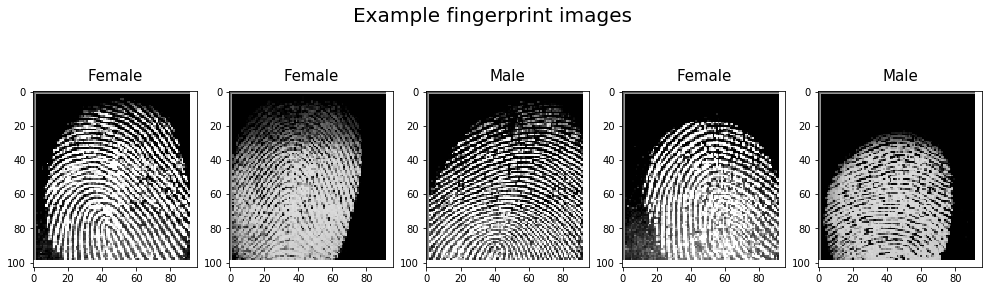

In [6]:
def plot_images(X, y, title='Example fingerprint images'):
    fig, axes = plt.subplots(1, len(X), figsize=(17, 5))
    
    for idx, ax in enumerate(axes):
        #ax.axis('off')
        ax.imshow(X[idx], cmap='gray_r')
        ax.set_title('Male' if y[idx] == 1 else 'Female', size=15, pad=10)
        
    fig.suptitle(title, fontsize=20)

random_sample = random.sample(range(6000), 5)
plot_images(X_real[random_sample], y_real[random_sample])

In [7]:
# Reshape the input array
X_real = np.array(X_real).reshape(-1, 103, 96, 1)

# Make a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.15, shuffle=True)

In [8]:
# Build some initial model
model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(103,96,1), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='accuracy', patience=5)


In [9]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, callbacks=[early_stopping])

Epoch 1/100
5100/5100 [==============================] - 60s 12ms/step - loss: 1.7782 - accuracy: 0.7708
Epoch 2/100
5100/5100 [==============================] - 59s 12ms/step - loss: 0.5615 - accuracy: 0.7925
Epoch 3/100
5100/5100 [==============================] - 56s 11ms/step - loss: 0.5500 - accuracy: 0.7898
Epoch 4/100
5100/5100 [==============================] - 55s 11ms/step - loss: 0.5013 - accuracy: 0.7957
Epoch 5/100
5100/5100 [==============================] - 55s 11ms/step - loss: 0.5259 - accuracy: 0.7982
Epoch 6/100
5100/5100 [==============================] - 56s 11ms/step - loss: 0.5000 - accuracy: 0.8035
Epoch 7/100
5100/5100 [==============================] - 59s 12ms/step - loss: 0.4506 - accuracy: 0.8159
Epoch 8/100
5100/5100 [==============================] - 58s 11ms/step - loss: 0.4175 - accuracy: 0.8282
Epoch 9/100
5100/5100 [==============================] - 61s 12ms/step - loss: 0.4811 - accuracy: 0.8267
Epoch 10/100
5100/5100 [==============================]

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)

900/900 [==============================] - 2s 2ms/step


In [11]:
test_loss

2.6760229810078937

In [12]:
test_acc

0.695555567741394